<a href="https://colab.research.google.com/github/RockDeng110/Predictive-Maintenance-for-Hydraulic-Systems/blob/main/Predictive-Maintenance-for-Hydraulic-Systems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# !git clone git@github.com:RockDeng110/Predictive-Maintenance-for-Hydraulic-Systems.git
!git clone https://github.com/RockDeng110/Predictive-Maintenance-for-Hydraulic-Systems.git
%cd Predictive-Maintenance-for-Hydraulic-Systems/data
!ls

Cloning into 'Predictive-Maintenance-for-Hydraulic-Systems'...
remote: Enumerating objects: 51, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 51 (delta 0), reused 10 (delta 0), pack-reused 40 (from 1)
Receiving objects: 100% (51/51), 90.61 MiB | 14.48 MiB/s, done.
Resolving deltas: 100% (2/2), done.
Updating files: 100% (30/30), done.
/content/Predictive-Maintenance-for-Hydraulic-Systems/data
condition+monitoring+of+hydraulic+systems


In [7]:

%cd condition+monitoring+of+hydraulic+systems
!ls

/content/Predictive-Maintenance-for-Hydraulic-Systems/data/condition+monitoring+of+hydraulic+systems
CE.txt		 documentation.txt  FS2.txt	 PS2.txt  PS5.txt  TS1.txt  TS4.txt
CP.txt		 EPS1.txt	    profile.txt  PS3.txt  PS6.txt  TS2.txt  VS1.txt
description.txt  FS1.txt	    PS1.txt	 PS4.txt  SE.txt   TS3.txt


In [6]:
!ls

condition+monitoring+of+hydraulic+systems


# Predictive Maintenance for Hydraulic Systems

## Abstractoin
Hydraulic systems are critical components in industrial applications, and unexpected failures can lead to costly downtime. This project explores the use of machine learning for predictive maintenance, leveraging the Condition Monitoring of Hydraulic Systems dataset. The objective is to classify failure risks and suggest preventive measures. By implementing various machine learning techniques, including decision trees, XGBoost, and time-series models, this study aims to enhance failure prediction accuracy while maintaining computational efficiency.


## Introduction
Hydraulic systems play a vital role in industrial operations, but their maintenance often relies on reactive or scheduled maintenance, leading to inefficiencies. Predictive maintenance, powered by machine learning, offers an intelligent approach to anticipating failures before they occur. This study aims to implement and evaluate machine learning techniques to develop a predictive maintenance model using the Condition Monitoring of Hydraulic Systems dataset.


## Data importing and basic understanding
The "Condition Monitoring of Hydraulic Systems" dataset provides comprehensive sensor data from a hydraulic test rig, facilitating the analysis and assessment of various component conditions. This dataset is particularly valuable for tasks such as fault detection, predictive maintenance, and machine learning model development.

**Dataset Overview:**

- **Source:** The dataset is available through the UCI Machine Learning Repository. citeturn0search0

- **Structure:** It comprises multivariate time-series data with 2,205 instances (cycles) and 43,680 features. Each cycle corresponds to a 60-second load sequence, during which various sensor measurements are recorded.

**Key Components Monitored:**

1. **Cooler:** Monitored for efficiency, with conditions ranging from full efficiency (100%) to near-total failure (3%).

2. **Valve:** Assessed based on switching behavior, with conditions from optimal (100%) to severe lag (73%).

3. **Pump:** Evaluated for internal leakage, categorized as no leakage (0), weak leakage (1), or severe leakage (2).

4. **Accumulator:** Monitored for pressure levels, from optimal (130 bar) to critically low pressure (90 bar).

**Sensors and Measurements:**

The dataset includes readings from multiple sensors, each capturing specific physical quantities at designated sampling rates:

- **Pressure Sensors (PS1 to PS6):** Measure pressure in bar at 100 Hz.

- **Motor Power Sensor (EPS1):** Records motor power in watts at 100 Hz.

- **Flow Sensors (FS1, FS2):** Capture volume flow in liters per minute at 10 Hz.

- **Temperature Sensors (TS1 to TS4):** Record temperature in degrees Celsius at 1 Hz.

- **Vibration Sensor (VS1):** Measures vibration in mm/s at 1 Hz.

- **Virtual Sensors:** Calculate cooling efficiency (%), cooling power (kW), and efficiency factor (%) at 1 Hz.

**Data Organization:**

- **Sensor Data Files:** Each sensor's readings are stored in separate tab-delimited text files, where rows represent cycles and columns denote data points within each cycle.

- **Profile File:** The 'profile.txt' file contains cycle-wise annotations of component conditions, facilitating supervised learning and condition assessment tasks.

**Applications:**

Researchers and practitioners can utilize this dataset to:

- **Develop Predictive Models:** Create models to predict component failures or maintenance needs based on sensor data.

- **Perform Fault Diagnosis:** Identify and classify different fault types and their severity levels.

- **Analyze Sensor Data:** Explore relationships between sensor measurements and component conditions to enhance system monitoring.

For practical applications and modeling examples using this dataset, refer to the GitHub repository that demonstrates condition monitoring using XGBoost.

By leveraging this dataset, you can gain insights into the operational health of hydraulic systems and develop robust models for predictive maintenance and fault detection.

## Data preprocessing

**Load Load Necessary Libraries**

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns





**Load Dataset**

In [8]:

# Load profile data (target labels)
profile_path = "./profile.txt"  # Update path if necessary
profile_df = pd.read_csv(profile_path, sep="\t", header=None)
profile_df.columns = ["Cooler_Condition", "Valve_Condition", "Pump_Leakage", "Accumulator_Pressure", "Unknown_Flag"]

# List of sensor files
sensor_files = ["EPS1.txt", "FS1.txt", "FS2.txt", "PS1.txt", "PS2.txt", "PS3.txt", "PS4.txt", "PS5.txt", "PS6.txt", "TS1.txt", "TS2.txt", "TS3.txt", "TS4.txt", "VS1.txt"]

# Extract features from sensor data
feature_dict = {}
for sensor_file in sensor_files:
    sensor_df = pd.read_csv(f"./{sensor_file}", sep="\t", header=None)
    feature_dict[f"{sensor_file}_mean"] = sensor_df.mean(axis=1)
    feature_dict[f"{sensor_file}_std"] = sensor_df.std(axis=1)
    feature_dict[f"{sensor_file}_min"] = sensor_df.min(axis=1)
    feature_dict[f"{sensor_file}_max"] = sensor_df.max(axis=1)
    feature_dict[f"{sensor_file}_range"] = feature_dict[f"{sensor_file}_max"] - feature_dict[f"{sensor_file}_min"]

# Convert extracted features into a DataFrame
features_df = pd.DataFrame(feature_dict)

# Merge features with profile data
data = pd.concat([features_df, profile_df], axis=1)





Summary Statistics of Sensor Data:
       EPS1.txt_mean  EPS1.txt_std  EPS1.txt_min  EPS1.txt_max  \
count    2205.000000   2205.000000   2205.000000   2205.000000   
mean     2495.509203    203.489501   2267.717914   2900.794921   
std        73.836682     27.766181     65.422202     49.647523   
min      2361.747267    185.105121   2097.800000   2813.400000   
25%      2442.933467    188.986584   2202.800000   2853.000000   
50%      2480.926633    196.153664   2260.000000   2897.400000   
75%      2548.211467    198.926555   2341.600000   2951.400000   
max      2740.641000    294.046838   2384.000000   2995.200000   

       EPS1.txt_range  FS1.txt_mean  FS1.txt_std   FS1.txt_min  FS1.txt_max  \
count     2205.000000   2205.000000  2205.000000  2.205000e+03  2205.000000   
mean       633.077007      6.198549     3.040077  4.535147e-07    20.130214   
std         17.060655      1.032883     0.189007  2.129589e-05     0.451934   
min        601.600000      2.018572     2.665898  0.00

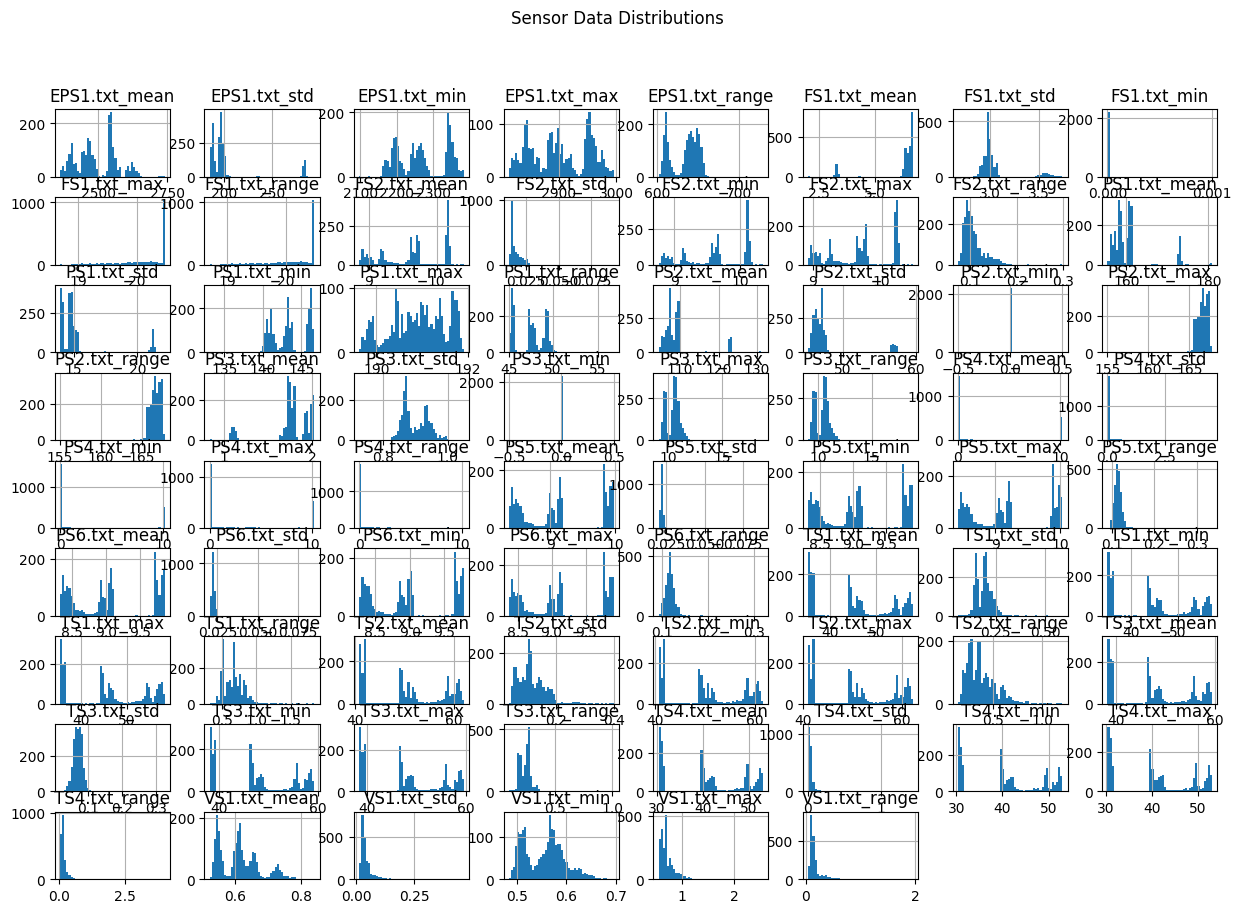

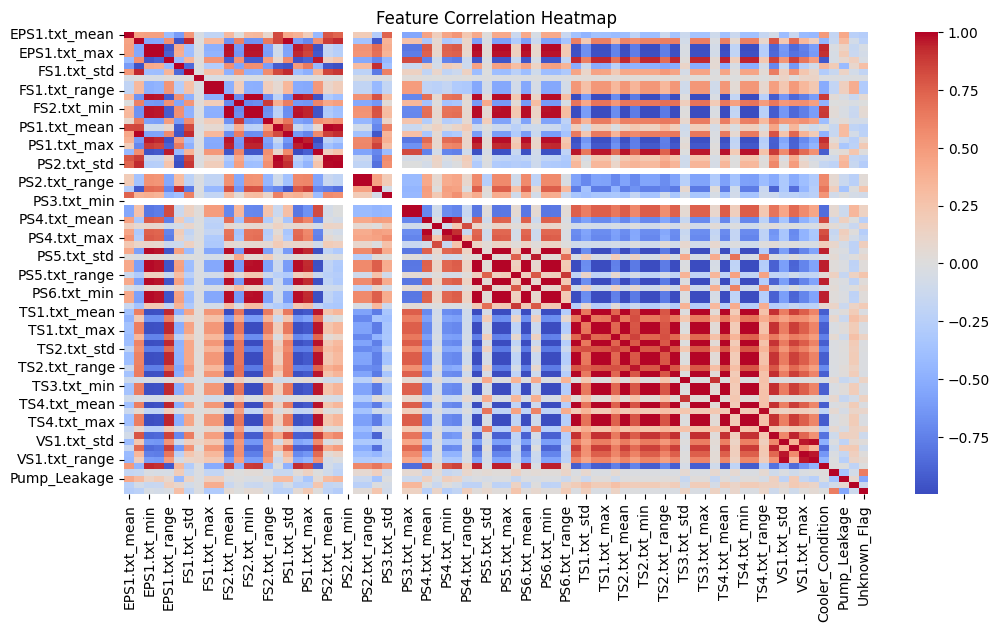

In [9]:
# Display summary statistics of sensor data
print("Summary Statistics of Sensor Data:")
print(features_df.describe())

# Data visualization: Histograms for sensor distributions
features_df.hist(figsize=(15, 10), bins=50)
plt.suptitle("Sensor Data Distributions")
plt.show()

# Correlation Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(data.corr(), cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()


In [10]:
# Define features and target
X = data.drop(columns=["Cooler_Condition", "Valve_Condition", "Pump_Leakage", "Accumulator_Pressure", "Unknown_Flag"])
y = data["Pump_Leakage"]  # Example: Predicting pump leakage

# PCA Comparison - Before PCA
print("Original Feature Dimension:", X.shape)

# Feature reduction using PCA
pca = PCA(n_components=10)
X_reduced = pca.fit_transform(X)

# PCA Comparison - After PCA
print("Reduced Feature Dimension:", X_reduced.shape)

Original Feature Dimension: (2205, 70)
Reduced Feature Dimension: (2205, 10)


Random Forest Accuracy: 0.9682539682539683
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       228
           1       0.95      0.91      0.93       101
           2       0.98      0.96      0.97       112

    accuracy                           0.97       441
   macro avg       0.97      0.96      0.96       441
weighted avg       0.97      0.97      0.97       441



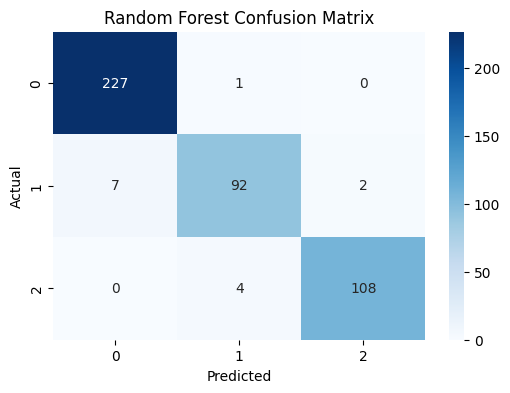

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:23:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.9705215419501134
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       228
           1       0.97      0.90      0.93       101
           2       0.98      0.98      0.98       112

    accuracy                           0.97       441
   macro avg       0.97      0.96      0.97       441
weighted avg       0.97      0.97      0.97       441



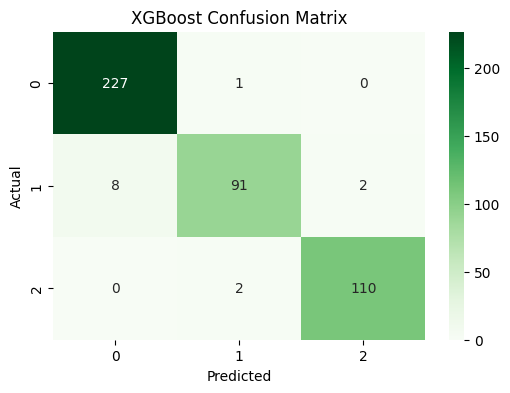

In [11]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix for Random Forest
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Blues")
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Train an XGBoost Classifier
xgb_model = XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

# Confusion Matrix for XGBoost
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt="d", cmap="Greens")
plt.title("XGBoost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
